In [ ]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len))

model.add(Conv1D(32, 7, activation = 'relu'))
model.add(MaxPooling1D(7))
model.add(Conv1D(32,5,activation = 'relu'))
model.add(MaxPooling1D(5))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
history = model.fit(pad_X_train, y_train, batch_size=64, epochs = 15, validation_split = 0.2)

Epoch 1/15
313/313 [==============================] - 13s 40ms/step - loss: 0.5325 - acc: 0.7059 - val_loss: 0.3554 - val_acc: 0.8452
Epoch 2/15
313/313 [==============================] - 13s 40ms/step - loss: 0.2635 - acc: 0.8952 - val_loss: 0.3247 - val_acc: 0.8654
Epoch 3/15
313/313 [==============================] - 13s 41ms/step - loss: 0.1629 - acc: 0.9415 - val_loss: 0.3657 - val_acc: 0.8638
Epoch 4/15
313/313 [==============================] - 12s 40ms/step - loss: 0.0926 - acc: 0.9707 - val_loss: 0.4432 - val_acc: 0.8628
Epoch 5/15
313/313 [==============================] - 12s 40ms/step - loss: 0.0442 - acc: 0.9887 - val_loss: 0.5599 - val_acc: 0.8588
Epoch 6/15
313/313 [==============================] - 12s 39ms/step - loss: 0.0170 - acc: 0.9972 - val_loss: 0.6671 - val_acc: 0.8542
Epoch 7/15
313/313 [==============================] - 12s 39ms/step - loss: 0.0066 - acc: 0.9992 - val_loss: 0.7221 - val_acc: 0.8552
Epoch 8/15
313/313 [==============================] - 12s 39ms

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)

# 시계열 데이터를 만들기 위한 과정
time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time < 0.5, np.cos(2 * np.pi * month_time), np.cos(2 * np.pi * month_time) + np.random.random(361))
######################################

def make_sequence (time_series, n):
  x_train, y_train = list(), list()

  for i in range(len(time_series)):
    x = time_series[i : (i + n)]
    if(i + n) < len(time_series):
      x_train.append(x)
      y_train.append(time_series[i + n])
    else:
      break
  return np.array(x_train), np.array(y_train)

n = 10
x_train, y_train = make_sequence(time_series, n)

x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)

from sklearn.model_selection import train_test_split

# 학습 데이터
patial_x_train = x_train[:30 * 11]
patial_y_train = y_train[:30 * 11]

# 테스트 데이터
x_test = x_train[30 * 11:]
y_test = y_train[30 * 11:]

print('train: ', patial_x_train.shape, patial_y_train)
print('test: ', x_test, y_test)

Epoch 1/200
11/11 [==============================] - 3s 4ms/step - loss: 240.6813 - mse: 240.6813
Epoch 2/200
11/11 [==============================] - 0s 3ms/step - loss: 217.2479 - mse: 217.2479
Epoch 3/200
11/11 [==============================] - 0s 3ms/step - loss: 191.9403 - mse: 191.9403
Epoch 4/200
11/11 [==============================] - 0s 3ms/step - loss: 167.3746 - mse: 167.3746
Epoch 5/200
11/11 [==============================] - 0s 3ms/step - loss: 145.4312 - mse: 145.4312
Epoch 6/200
11/11 [==============================] - 0s 3ms/step - loss: 126.7890 - mse: 126.7890
Epoch 7/200
11/11 [==============================] - 0s 3ms/step - loss: 115.8814 - mse: 115.8814
Epoch 8/200
11/11 [==============================] - 0s 3ms/step - loss: 106.1970 - mse: 106.1970
Epoch 9/200
11/11 [==============================] - 0s 3ms/step - loss: 99.9315 - mse: 99.9315
Epoch 10/200
11/11 [==============================] - 0s 3ms/step - loss: 96.1343 - mse: 96.1343
Epoch 11/200
11/11 [===

1/1 [==============================] - 0s 197ms/step


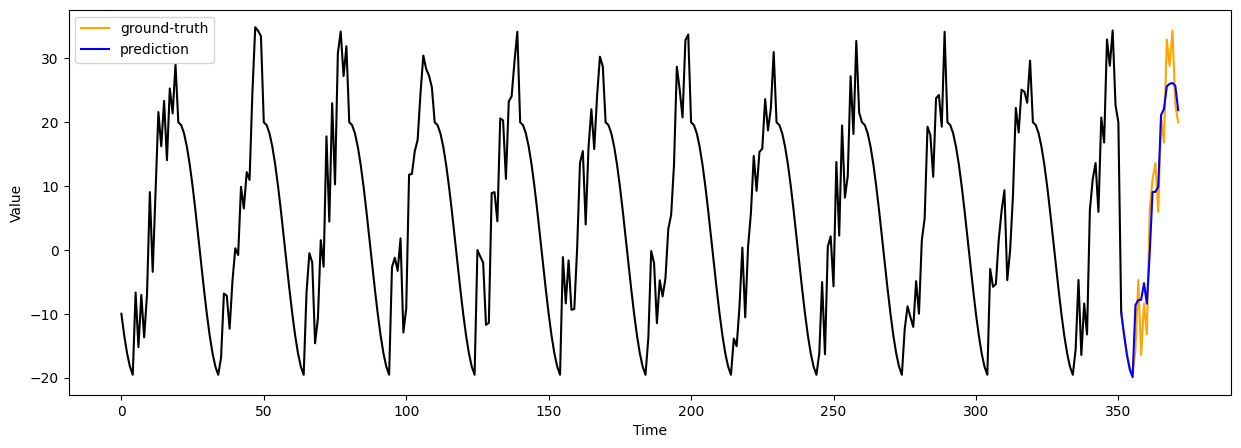

In [ ]:
from scipy.optimize import optimize
from threading import active_count
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Conv1D(32, 3, activation = 'relu', input_shape = (10, 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation = 'relu'))
model.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

model.fit(x_train, y_train, epochs = 200, batch_size = 32)



1/1 [==============================] - 0s 60ms/step


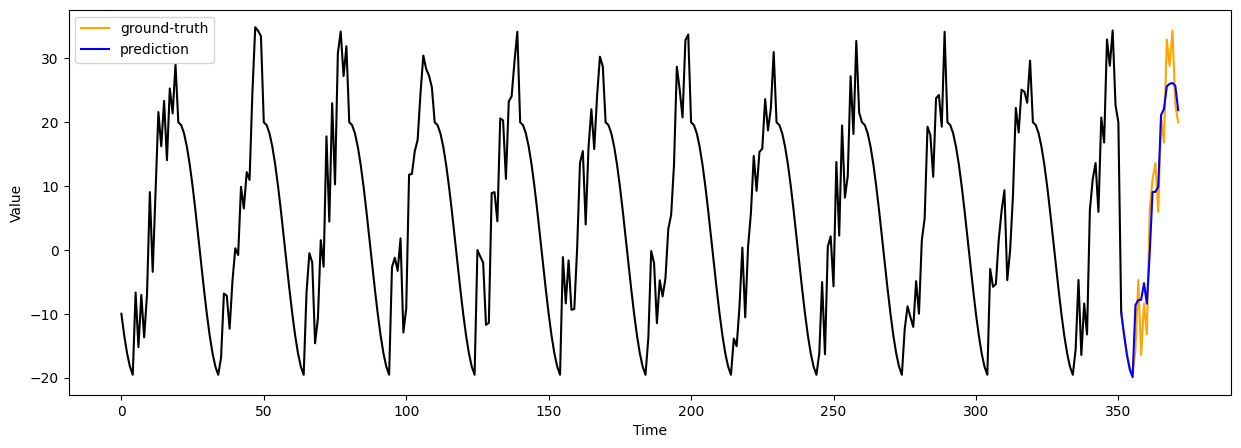

In [ ]:
pred = model.predict(x_test)
train_range = np.arange(len(x_train) + 1)
pred_range = np.arange(len(y_train), len(y_train) + len(pred))
plt.figure(figsize=(15,5))
plt.xlabel("Time")
plt.ylabel("Value")
plt.plot(train_range, np.append(y_train, y_test[0]), color = 'black')
plt.plot(pred_range, y_test, color = 'orange', label = 'ground-truth')
plt.plot(pred_range, pred, color = 'blue', label = 'prediction')
plt.legend()
plt.show()

In [ ]:
y_train

array([[-1.00000000e+01],
       [-1.33826121e+01],
       [-1.61803399e+01],
       [-1.82709092e+01],
       [-1.95629520e+01],
       [-6.66393899e+00],
       [-1.52209392e+01],
       [-7.04236950e+00],
       [-1.36967643e+01],
       [-6.98788244e+00],
       [ 9.06427746e+00],
       [-3.43320407e+00],
       [ 9.29769267e+00],
       [ 2.16038789e+01],
       [ 1.62476811e+01],
       [ 2.33532841e+01],
       [ 1.40664421e+01],
       [ 2.53027272e+01],
       [ 2.13879364e+01],
       [ 2.90839313e+01],
       [ 2.00000000e+01],
       [ 1.95629520e+01],
       [ 1.82709092e+01],
       [ 1.61803399e+01],
       [ 1.33826121e+01],
       [ 1.00000000e+01],
       [ 6.18033989e+00],
       [ 2.09056927e+00],
       [-2.09056927e+00],
       [-6.18033989e+00],
       [-1.00000000e+01],
       [-1.33826121e+01],
       [-1.61803399e+01],
       [-1.82709092e+01],
       [-1.95629520e+01],
       [-1.68766917e+01],
       [-6.82506738e+00],
       [-7.15699540e+00],
       [-1.2

In [ ]:
np.append(y_train, y_test[0])

array([-1.00000000e+01, -1.33826121e+01, -1.61803399e+01, -1.82709092e+01,
       -1.95629520e+01, -6.66393899e+00, -1.52209392e+01, -7.04236950e+00,
       -1.36967643e+01, -6.98788244e+00,  9.06427746e+00, -3.43320407e+00,
        9.29769267e+00,  2.16038789e+01,  1.62476811e+01,  2.33532841e+01,
        1.40664421e+01,  2.53027272e+01,  2.13879364e+01,  2.90839313e+01,
        2.00000000e+01,  1.95629520e+01,  1.82709092e+01,  1.61803399e+01,
        1.33826121e+01,  1.00000000e+01,  6.18033989e+00,  2.09056927e+00,
       -2.09056927e+00, -6.18033989e+00, -1.00000000e+01, -1.33826121e+01,
       -1.61803399e+01, -1.82709092e+01, -1.95629520e+01, -1.68766917e+01,
       -6.82506738e+00, -7.15699540e+00, -1.23417656e+01, -4.86949247e+00,
        2.68404157e-01, -7.92788173e-01,  9.88983111e+00,  6.49404817e+00,
        1.21975898e+01,  1.09678897e+01,  2.46690133e+01,  3.49009840e+01,
        3.43314620e+01,  3.35090550e+01,  2.00000000e+01,  1.95629520e+01,
        1.82709092e+01,  